In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
channel_id = '796949'
field_no = '1'
url_thingspeak = 'https://thingspeak.com/channels/'+channel_id+'/fields/'+field_no+'.csv'
data = pd.read_csv(url_thingspeak)

In [3]:
# Preprocessing string to timestamp
import datetime
#2019-06-03 10:47:42 UTC
for i in range(len(data['created_at'])):
    dt = datetime.datetime.strptime(data['created_at'][i], '%Y-%m-%d %H:%M:%S UTC')
    data['created_at'][i] = dt.timestamp()

C:\Users\Raj Chandvaniya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
#  (X, Y) - (Timestamp, Temperature)
X = data['created_at'].to_numpy().reshape(-1,1)
y = data['field1'].to_numpy().reshape(-1,1)

In [5]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Raj Chandvaniya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Raj Chandvaniya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

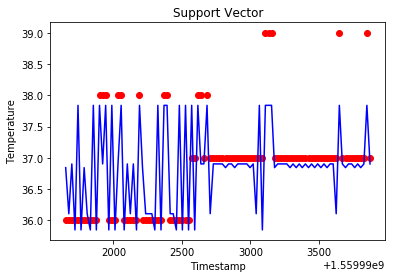

In [7]:
# Visualising the SVR results (for higher resolution and smoother curve)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Support Vector')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.show()